<a href="https://colab.research.google.com/github/AlexKostjuk/Dz_13/blob/master/dz_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install 'tensorflow[and-cuda]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import kagglehub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import pickle



In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


перевіримо 2 цікаві моделі за основу візьмемо mnist але щоб мати результати які б відповідали реальним збільшемо рожширення та переведемо в RGB

EfficientNetV2

In [ ]:
base_model = tf.keras.applications.EfficientNetV2S(
    include_top=True,
    weights='imagenet',
    input_shape=(384, 384, 3)
)


87549136/87549136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    layers.Resizing(384, 384),
    layers.Lambda(lambda x: tf.tile(x, [1, 1, 1, 3])),  #  RGB
    layers.Lambda(lambda x: tf.keras.applications.efficientnet_v2.preprocess_input(x)),
    base_model,
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [3]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=6,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1940s 2s/step - accuracy: 0.9095 - loss: 0.2976 - val_accuracy: 0.9877 - val_loss: 0.0438
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1602s 2s/step - accuracy: 0.9842 - loss: 0.0571 - val_accuracy: 0.9857 - val_loss: 0.0561
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1643s 2s/step - accuracy: 0.9867 - loss: 0.0483 - val_accuracy: 0.9942 - val_loss: 0.0180
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1641s 2s/step - accuracy: 0.9881 - loss: 0.0458 - val_accuracy: 0.9944 - val_loss: 0.0177
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1641s 2s/step - accuracy: 0.9896 - loss: 0.0373 - val_accuracy: 0.9928 - val_loss: 0.0256
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 1642s 2s/step - accuracy: 0.9901 - loss: 0.0357 - val_accuracy: 0.9904 - val_loss: 0.0358


оцінка

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nТочність на тестовому наборі: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 217ms/step - accuracy: 0.9916 - loss: 0.0245

Точність на тестовому наборі: 0.9944


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/mnist_model_EfficientNetV2.h5', include_optimizer=True)

In [ ]:
with open('/content/drive/MyDrive/mnist-history_EfficientNetV2.pkl', 'wb') as f:
    pickle.dump(history.history, f)

MobileNetV3Small

In [ ]:
base_model_mobilenet = tf.keras.applications.MobileNetV3Small(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

10734624/10734624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_mobilenet = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    layers.Resizing(224, 224),
    layers.Lambda(lambda x: tf.tile(x, [1, 1, 1, 3])),
    layers.Lambda(lambda x: tf.keras.applications.mobilenet_v3.preprocess_input(x)),
    base_model_mobilenet,
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_mobilenet = model_mobilenet.fit(
    x_train, y_train,
    epochs=6,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 164s 112ms/step - accuracy: 0.8867 - loss: 0.3773 - val_accuracy: 0.9344 - val_loss: 0.2653
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 60ms/step - accuracy: 0.9802 - loss: 0.0841 - val_accuracy: 0.9535 - val_loss: 0.2441
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9827 - loss: 0.0855 - val_accuracy: 0.9771 - val_loss: 0.1386
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9838 - loss: 0.0799 - val_accuracy: 0.9700 - val_loss: 0.1419
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9849 - loss: 0.0776 - val_accuracy: 0.9801 - val_loss: 0.0950
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.9858 - loss: 0.0744 - val_accuracy: 0.9709 - val_loss: 0.1619


In [ ]:
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(x_test, y_test)
print(f'\nТочність MobileNetV3Small на тестовому наборі: {test_acc_mobilenet:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9795 - loss: 0.0845

Точність MobileNetV3Small на тестовому наборі: 0.9801


In [ ]:
model_mobilenet.save('/content/drive/MyDrive/mnist_model_MobileNetV3Small.h5', include_optimizer=True)

In [ ]:
with open('/content/drive/MyDrive/mnist-history_MobileNetV3Small.pkl', 'wb') as f:
    pickle.dump(history_mobilenet.history, f)

Візуалізація

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

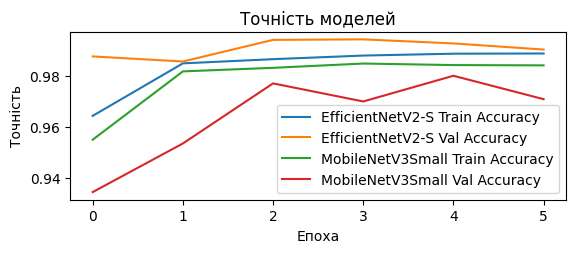

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='EfficientNetV2-S Train Accuracy')
plt.plot(history.history['val_accuracy'], label='EfficientNetV2-S Val Accuracy')
plt.plot(history_mobilenet.history['accuracy'], label='MobileNetV3Small Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV3Small Val Accuracy')
plt.title('Точність моделей')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

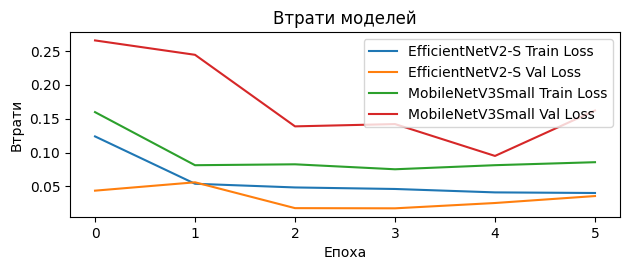

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='EfficientNetV2-S Train Loss')
plt.plot(history.history['val_loss'], label='EfficientNetV2-S Val Loss')
plt.plot(history_mobilenet.history['loss'], label='MobileNetV3Small Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='MobileNetV3Small Val Loss')
plt.title('Втрати моделей')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

з графіків видно що переша модель підтверджує що вона на сьогоді показує найкращі результати але за це доводиться платити дуже великими вимогами до обчислювальних систем а от друга модельпоказала не насеільки вражаючий результат але показала вражаючу швидкість тож можна спробувати підвищити кількість епох

In [4]:
base_model_mobilenet1 = tf.keras.applications.MobileNetV3Small(
    include_top=True,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

10734624/10734624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model_mobilenet1 = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    layers.Resizing(224, 224),
    layers.Lambda(lambda x: tf.tile(x, [1, 1, 1, 3])),
    layers.Lambda(lambda x: tf.keras.applications.mobilenet_v3.preprocess_input(x)),
    base_model_mobilenet1,
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [6]:
model_mobilenet1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history_mobilenet1 = model_mobilenet1.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    # callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9811 - loss: 0.0948 - val_accuracy: 0.8985 - val_loss: 0.5443
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9794 - loss: 0.1071 - val_accuracy: 0.9569 - val_loss: 0.2625
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9849 - loss: 0.0788 - val_accuracy: 0.9823 - val_loss: 0.1084
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9643 - loss: 0.1196 - val_accuracy: 0.9723 - val_loss: 0.1641
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9827 - loss: 0.0874 - val_accuracy: 0.9842 - val_loss: 0.0832
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9832 - loss: 0.0817 - val_accuracy: 0.9637 - val_loss: 0.1607
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9766 - loss: 0.1139 - val_accuracy: 0.9372 - val_loss: 0.3673
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9788 - loss: 0.1046 - 

In [9]:
test_loss_mobilenet1, test_acc_mobilenet1 = model_mobilenet1.evaluate(x_test, y_test)
print(f'\nТочність MobileNetV3Small на тестовому наборі: {test_acc_mobilenet1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8602 - loss: 0.8734

Точність MobileNetV3Small на тестовому наборі: 0.8601


бачимо що модель дала гірший результат скоріш завсе перетренувалась

тож можу зробити висновок хоча 2 модель показала гірший результат але теж має право на житя в своїх умовах коли є обмеження в обчислювальній потужності або треба отримати результат як найшвидше а от безкомпромісна точність це до першої моделі